<a href="https://colab.research.google.com/github/yash-datascience/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_Yash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
width = 0.75

sns.set(style="whitegrid", palette="muted", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - ML - Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## First Look at Data

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Finding Nulls

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Finding how many unique values are there in the dataset

In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Data Cleaning

In [ ]:
#df = df.dropna( how='any',subset=['cast', 'director'])

### Converting into a proper date-time format and adding two more features year and month.

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

### Finding seasons from durations

In [ ]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

### Renaming the ‘listed_in’ feature to the genre for easy use.

In [ ]:
df = df.rename(columns={"listed_in":"genre"})
df['genre'] = df['genre'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,International TV Shows,In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [ ]:
df.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,genre,description,season_count
count,4979,4979,4979,4979,4979,4979,4979,4979,4979,4979,4979
unique,4979,2,4979,3711,4825,545,15,193,32,4966,10
top,s2505,Movie,The Saint,"Raúl Campos, Jan Suter",Samuel West,United States,TV-MA,,Dramas,A surly septuagenarian gets another chance at ...,
freq,1,4834,1,18,10,1656,1724,145,1372,3,4834


## Exploratory Data Analysis

In [ ]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2021,1))

In [ ]:
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

In [ ]:
#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

In [ ]:
index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

In [ ]:
movies

2017    744
2018    734
2016    642
2019    582
2020    411
2015    382
2014    244
2013    202
2012    158
2010    136
2011    127
2009    103
2008    102
Name: release_year, dtype: int64

In [ ]:
tv_shows

2020    457
2019    414
2018    387
2017    268
2016    240
2015    159
2014     90
2013     65
2012     61
2011     39
2010     37
2009     34
2008     23
Name: release_year, dtype: int64

In [ ]:
#Top Movie and TV Show producer country:
top5_producer_countries = df.country.value_counts().sort_values(ascending=False).head(5)

In [ ]:
#Top most common Actors an directors (Movies and tv shows):
casts = ", ".join(df.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_common_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_common_actors][::-1]
values = [i[1] for i in most_common_actors][::-1]
df1 = pd.DataFrame(labels,values)

most_common_directors = df.director.value_counts().head(5).sort_values(ascending=True)

In [ ]:
df1=df1.reset_index()
df1

,index,0
0,30,Om Puri
1,30,Naseeruddin Shah
2,35,Shah Rukh Khan
3,42,Anupam Kher


[Text(0, 0.5, 'Releases'),
 Text(0.5, 0, 'Release Year'),
 Text(0.5, 1.0, 'Movies / Tv Shows relesed per year')]

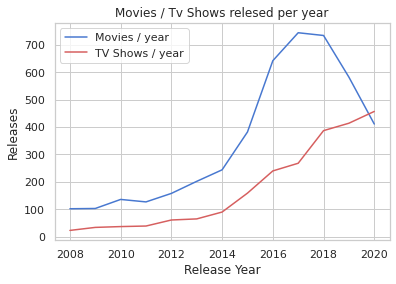

In [ ]:
#Line plot of Movies and TV Shows released by Netflix per year")
ax = sns.lineplot(data=movies, color="b", label="Movies / year")
ax = sns.lineplot(data=tv_shows, color="r", label="TV Shows / year")
ax.set(title="Movies / Tv Shows relesed per year", ylabel = "Releases",xlabel='Release Year')

### From graph above we can see that Netflix has increasingly focusing on TV rather than movies in recent years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Contents'),
 Text(0.5, 0, 'Countries'),
 Text(0.5, 1.0, 'Top 5 Content producing Countries')]

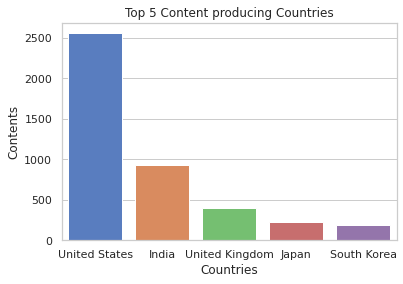

In [ ]:
ax = sns.barplot(top5_producer_countries.index, top5_producer_countries.values)
ax.set(title="Top 5 Content producing Countries", ylabel = "Contents",xlabel='Countries')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Om Puri'),
 Text(0, 0, 'Naseeruddin Shah'),
 Text(0, 0, 'Shah Rukh Khan'),
 Text(0, 0, 'Anupam Kher')]

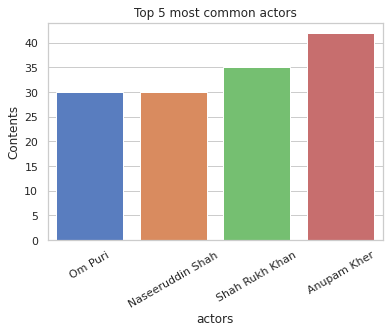

In [ ]:
ax = sns.barplot(df1[0], df1['index'].sort_values(ascending=False),label='Actors')
ax.set(title="Top 5 most common actors", ylabel = "Contents",xlabel='actors')
ax.set_xticklabels(
    labels=df1[0], rotation=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Youssef Chahine'),
 Text(0, 0, 'Cathy Garcia-Molina'),
 Text(0, 0, 'Jay Karas'),
 Text(0, 0, 'Marcus Raboy'),
 Text(0, 0, 'Raúl Campos, Jan Suter')]

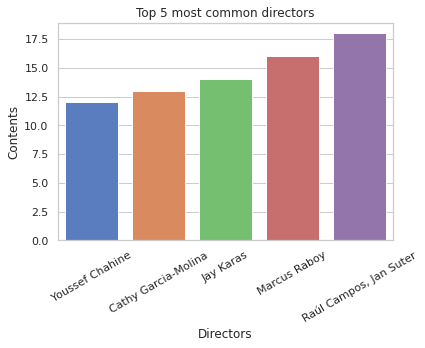

In [ ]:
ax = sns.barplot(most_common_directors.index, most_common_directors.values, label='Directors')
ax.set(title="Top 5 most common directors", ylabel = "Contents",xlabel='Directors')
ax.set_xticklabels(
    labels=most_common_directors.index, rotation=30)

## Visualization using Plotly

In [ ]:
'''Plotly visualization .'''
import pandas as pd

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.figure_factory as ff

## WORD CLOUD

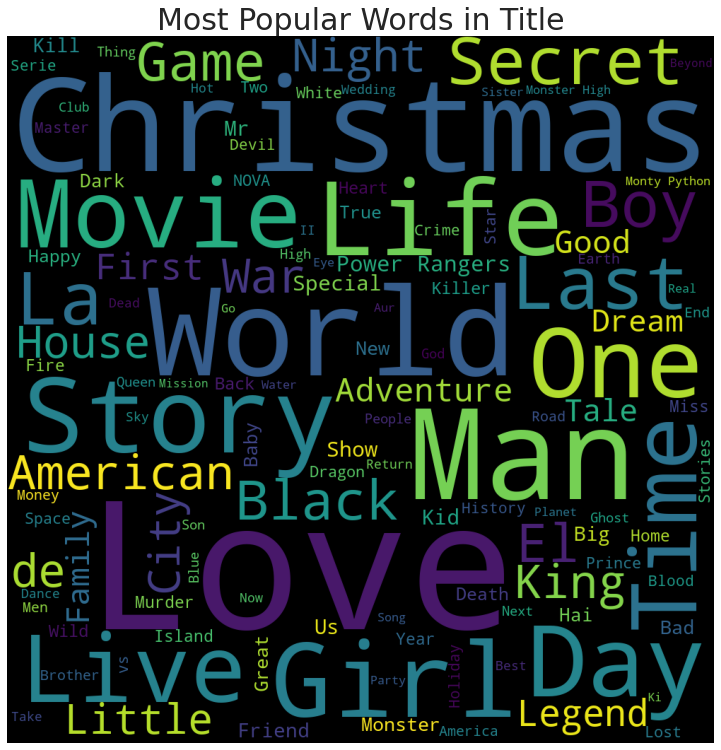

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

### It seems like words like "Love", "Man", "World", "Story" are very common in titles.

However, I am suprised by the overwhelming number of content having "Christmas" in their title.

I am suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the onth of December. However, I do not have the release data in this data to conform my hypothesis.

In [ ]:
'''A Function To Plot Pie Plot using Plotly'''

# Heatmap
# Correlation between the feature show with the help of visualisation
corrs = df.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                          plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                          font=dict(color='#8a8d93'))
fig_heatmap.show(renderer='colab')

In [ ]:
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

In [ ]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

In [ ]:
fig_donut = px.pie(df, names='rating', height=1000, width=1000, hole=0.7,

title='MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=80, b=10, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

In [ ]:
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

In [ ]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

In [ ]:
temp_df = df['genre'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['genre'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'GENRE DISTRIBUTION' , xaxis = dict(title = 'Genres'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

bold('**MOST POPULAR GENRES ON NETFILX ARE:**')
bold('**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**')

**MOST POPULAR GENRES ON NETFILX ARE:**

**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**

In [ ]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

In [ ]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

In [ ]:
features=['genre','director','cast','description','title']
filters = df[features]

filters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        7787 non-null   object
 1   director     5398 non-null   object
 2   cast         7069 non-null   object
 3   description  7787 non-null   object
 4   title        7787 non-null   object
dtypes: object(5)
memory usage: 304.3+ KB


## Finally Handling Nulls

In [ ]:
filters['director'] = filters['director'].fillna(filters['director'].mode()[0])
filters['cast'] = filters['cast'].fillna(filters['cast'].mode()[0])

filters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        7787 non-null   object
 1   director     7787 non-null   object
 2   cast         7787 non-null   object
 3   description  7787 non-null   object
 4   title        7787 non-null   object
dtypes: object(5)
memory usage: 304.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
features2=['genre','director','cast','title']

In [ ]:
for feature in features2:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,genre,director,cast,description,title
0,internationaltvshows,"raúlcampos,jansuter","joãomiguel,biancacomparato,michelgomes,rodolfo...",In a future where the elite inhabit an island ...,3%
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...",After a devastating earthquake hits Mexico Cit...,7:19
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","When an army recruit is found dead, his fellow...",23:59
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","In a postapocalyptic world, rag-doll robots hi...",9
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",A brilliant group of students become card-coun...,21


In [ ]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['genre']+' '+ x['description']

In [ ]:
filters['soup'] = filters.apply(create_soup, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
filters.head(5)

,genre,director,cast,description,title,soup
0,internationaltvshows,"raúlcampos,jansuter","joãomiguel,biancacomparato,michelgomes,rodolfo...",In a future where the elite inhabit an island ...,3%,"raúlcampos,jansuter joãomiguel,biancacomparato..."
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...",After a devastating earthquake hits Mexico Cit...,7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","When an army recruit is found dead, his fellow...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","In a postapocalyptic world, rag-doll robots hi...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",A brilliant group of students become card-coun...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."


In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 7787):
    review = re.sub('[^a-zA-Z]',' ',filters['soup'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem (word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(corpus)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words='english')
#X = vectorizer.fit_transform(df)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

sil_score_list=[]
range_n_clusters = [11,12,13,14,15,16,17,18,19,20,21,22]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(count_matrix)
    centers = clusterer.cluster_centers_

    score = silhouette_score(count_matrix, preds)
    sil_score_list.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 11, silhouette score is -0.02333161924220264
For n_clusters = 12, silhouette score is -0.021051582872291832
For n_clusters = 13, silhouette score is -0.02002979043294562
For n_clusters = 14, silhouette score is -0.024106313467881994
For n_clusters = 15, silhouette score is -0.019077914825030132
For n_clusters = 16, silhouette score is -0.030456295820257363
For n_clusters = 17, silhouette score is -0.025182976403956666
For n_clusters = 18, silhouette score is -0.016952539207644626
For n_clusters = 19, silhouette score is -0.036585976090499614
For n_clusters = 20, silhouette score is -0.03725150558727212
For n_clusters = 21, silhouette score is -0.03480781233602365
For n_clusters = 22, silhouette score is -0.04376679328310282


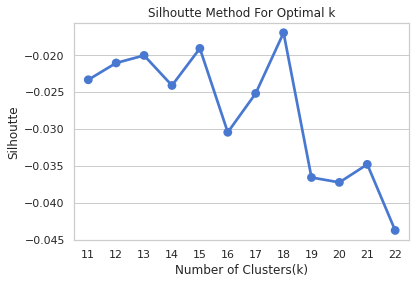

In [ ]:
sns.pointplot(x = range_n_clusters, y = sil_score_list)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte')
plt.title('Silhoutte Method For Optimal k')
plt.show()

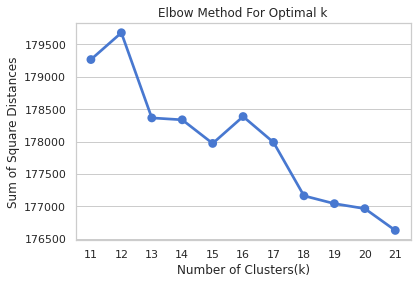

In [ ]:
sum_of_sq_dist = {}
for k in range(11,22):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 100)
    km = km.fit(count_matrix)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## By looking at all three plots, silhouette score, Elbow plot and Dendrogram we have choosen 18 as value of k.

In [ ]:
km = KMeans(n_clusters=18, init='k-means++')
km.fit(count_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]   #centroids sorted position

In [ ]:
terms = count.get_feature_names()

In [ ]:
for i in range(5):
    print("cluster %d:" % i)
    for ind in order_centroids[i,:15]:
        print('%s' % terms[ind])
    print()

cluster 0:
docuseri
jansut
ra
lcampo
base
deep
stori
dive
build
cgi
olasupo
ezekiel
japan
number
johnni

cluster 1:
ra
jansut
lcampo
davidattenborough
docuseri
seri
crimetvshow
documentari
world
realitytv
life
explor
stori
live
follow

cluster 2:
man
drama
comedi
young
woman
marri
love
life
father
becom
famili
wife
friend
daughter
fall

cluster 3:
year
drama
old
love
comedi
boy
home
woman
girl
young
fall
life
meet
brother
friend

cluster 4:
stand
upcomedi
special
comedian
comic
comedi
jansut
ra
lcampo
life
stage
live
share
new
sex



## Cluster Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

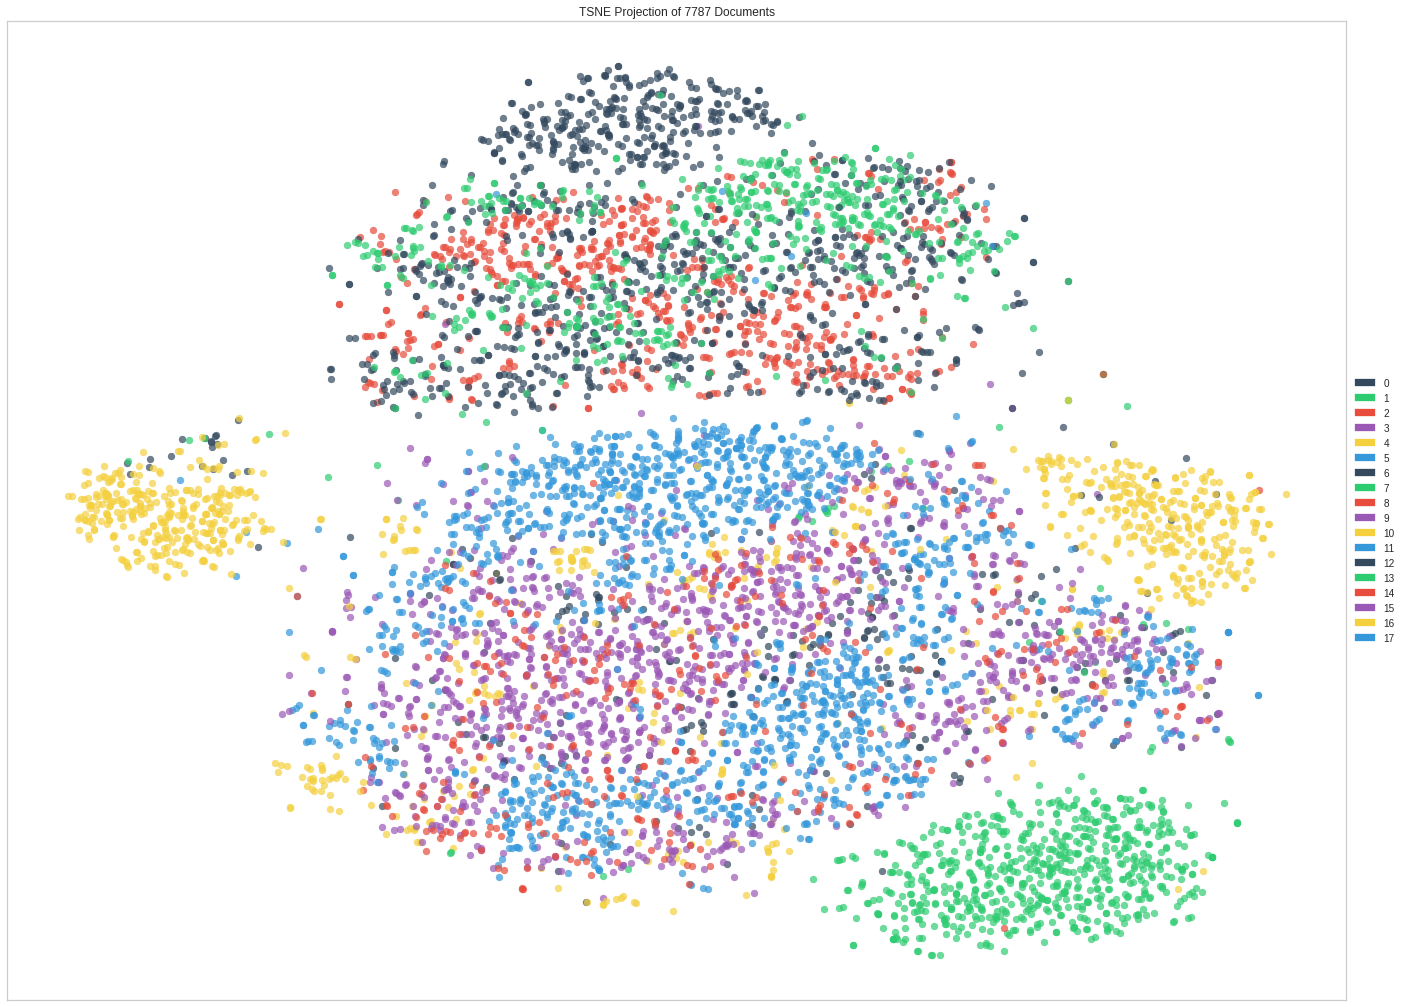

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.style import set_palette
set_palette('flatui')

# Load the data and create document vectors
corpus1 = corpus
count1 = CountVectorizer()

X = count1.fit_transform(corpus1)
y = km.labels_



# Create the visualizer and draw the vectors
plt.figure(figsize=(30,18),)
color = filters['genre']


tsne = TSNEVisualizer(colors=color)
tsne.fit(X, y)
tsne.poof()


In [ ]:
from sklearn.manifold import TSNE
# Perform t-SNE to reduce the dimensionality down to 2 dimenions, for easier plotting.
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(count_matrix)

In [ ]:
trace = go.Scatter(
    x=tsne_fit.T[0], 
    y=tsne_fit.T[1],
    mode='markers',
   
   
)

data = [trace]
layout = go.Layout(
    showlegend=False
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer='colab')

## Netflix Recommendation System

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filters.head()

,genre,director,cast,description,title,soup
0,internationaltvshows,"raúlcampos,jansuter","joãomiguel,biancacomparato,michelgomes,rodolfo...",inafuturewheretheeliteinhabitanislandparadisef...,3%,"raúlcampos,jansuter joãomiguel,biancacomparato..."
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."


In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('Naruto', cosine_sim2)

4405                    Naruto Shippûden the Movie: Bonds
4410     Naruto the Movie 2: Legend of the Stone of Gelel
4407                      Naruto Shippuden : Blood Prison
4406         Naruto Shippûden the Movie: The Will of Fire
4408                          Naruto Shippuden: The Movie
4411    Naruto the Movie 3: Guardians of the Crescent ...
973                                                Bleach
869                              Beyblade Burst Evolution
3959                              Marvel Anime: Wolverine
5345                         Saint Seiya: The Lost Canvas
Name: title, dtype: object